In [1]:
#Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
#leitura do dataframe de acidentes de carros
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/car_crashes.csv"
df = pd.read_csv(url)

# Selecionando as colunas desejadas
X = df[['speeding', 'alcohol', 'not_distracted', 'no_previous']]
y = df['total']
    
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
#Definindo a arquiteutra da rede neural
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(1)
])
#Compilaçao do modelo com o otimizador e a função de perda
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Treinamento do modelo
history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=1
)

Epoch 1/100


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 303.4301 - mae: 16.7706 - val_loss: 336.4801 - val_mae: 18.1478
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 299.2895 - mae: 16.6555 - val_loss: 331.6627 - val_mae: 18.0164
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 295.2615 - mae: 16.5434 - val_loss: 327.0667 - val_mae: 17.8901
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 291.3238 - mae: 16.4336 - val_loss: 322.8982 - val_mae: 17.7741
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 287.6297 - mae: 16.3300 - val_loss: 319.2039 - val_mae: 17.6713
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 284.2153 - mae: 16.2343 - val_loss: 315.8939 - val_mae: 17.5795
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 280.9941 - mae: 16.1433 - val_loss: 312.6832 - val_mae: 17.4901
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 277.8851 - mae: 16.0552 - val_loss: 309.5274 - val_mae: 17.4017
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [4]:
#Previsao do modelo
y_pred = model.predict(X_test)

#Calculando o desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


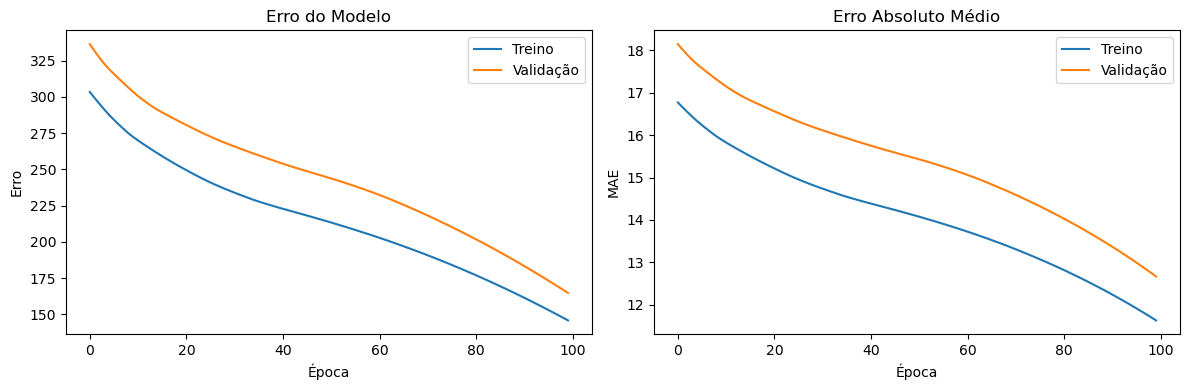

In [6]:
plt.figure(figsize=(12, 4))
    
#Plotando o erro do treino 
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Erro do Modelo')
plt.xlabel('Época')
plt.ylabel('Erro')
plt.legend()
    
#Plotando o erro absoluto médio
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Treino')
plt.plot(history.history['val_mae'], label='Validação')
plt.title('Erro Absoluto Médio')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
    
plt.tight_layout()
plt.show()